In [ ]:
# Data Wrangling II
# Create an "Academic performance" dataset of students and perform the following operations using Python.
# 1. Scan allvariables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal withthem.
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal withthem.
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normaldistribution.
# Reason and document your approach properly.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
dataset = pd.read_csv("StudentsPerformance_modified.csv")

In [4]:
# Display the first 5 rows of the dataset
print(dataset.head())
print("-" * 100)

# Display the information of the dataset
print(dataset.info())
print("-" * 100)

# Display the summary statistics of the dataset
print(dataset.describe())
print("-" * 100)

# Display the number of missing values in the dataset
print(dataset.isnull().sum())
print("-" * 100)

# Display the data types of the variables in the dataset
print(dataset.dtypes)
print("-" * 100)

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course math score  reading score  writing score  
0                    none         72           72.0           74.0  
1               completed         69           90.0           88.0  
2                    none         90           95.0           93.0  
3                    none         47           57.0           44.0  
4                    none         76           78.0           75.0  
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 

In [8]:
# As we can see the datatype of math score is object, we need to convert it to float
# dataset["math score"] = dataset["math score"].astype(float) # This will throw an error as the data consists of '?' values

# Replace '?' with NaN
dataset["math score"] = dataset["math score"].replace("?", np.nan)

# Convert the datatype of math score to float
dataset["math score"] = dataset["math score"].astype(float)

dataset.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [14]:
# Dealing with missing values:

#dropna(): Drops rows or columns containing missing values.
#fillna(): Fills missing values with specified methods or values.

test = dataset.dropna()
test.info()

# dataset.dropna(inplace=True) # Drop rows with missing values inplace in the original dataset


# Fill missing values with the mean of the column
dataset["math score"] = dataset["math score"].fillna(dataset["math score"].mean())

# Fill missing values with the median of the column
dataset["reading score"] = dataset["reading score"].fillna(dataset["reading score"].median())

# Fill missing values with the mode of the column
dataset["writing score"] = dataset["writing score"].fillna(dataset["writing score"].mode()[0])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 no

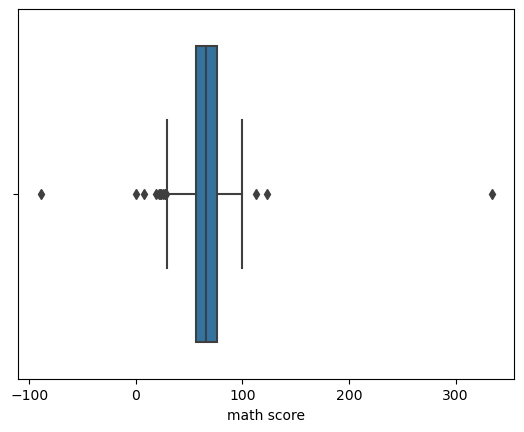

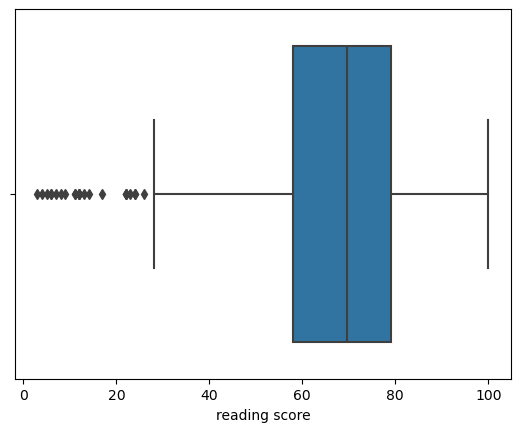

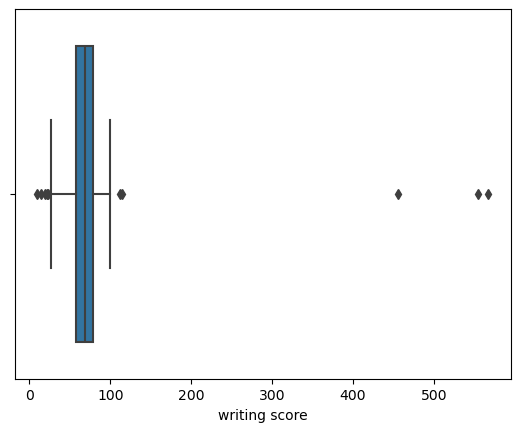

In [26]:
# Outlier Detection:
# Outliers are extreme values that deviate from other observations in the dataset. They may indicate a variability in a measurement, experimental errors, or a novelty. Outliers can have a disproportionate effect on statistical analysis, which can lead to misleading interpretations. Therefore, it is important to detect and deal with outliers in the dataset.

# For visualizing outliers, we can use library like seaborn to create boxplots. 
# Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. 

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=dataset["math score"])
plt.show()

sns.boxplot(x=dataset["reading score"])
plt.show()

sns.boxplot(x=dataset["writing score"])
plt.show()

Max threshold for math score: 86.0
Min threshold for math score: 47.0
<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       799 non-null    object 
 1   race/ethnicity               799 non-null    object 
 2   parental level of education  799 non-null    object 
 3   lunch                        799 non-null    object 
 4   test preparation course      799 non-null    object 
 5   math score                   799 non-null    float64
 6   reading score                799 non-null    float64
 7   writing score                799 non-null    float64
dtypes: float64(3), object(5)
memory usage: 56.2+ KB


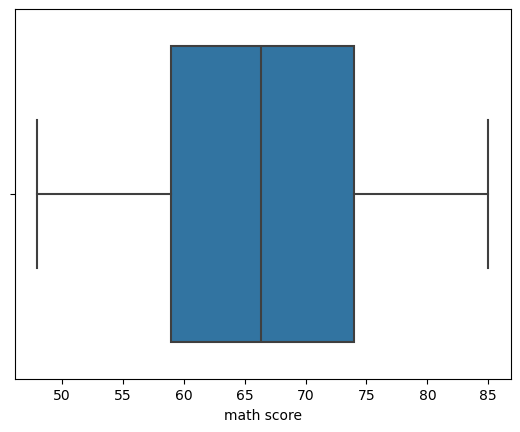

In [31]:
# Method 1: Percentile-based outlier detection

max_threshold = dataset["math score"].quantile(0.95)
print(f"Max threshold for math score: {max_threshold}")

min_threshold = dataset["math score"].quantile(0.05)
print(f"Min threshold for math score: {min_threshold}")

# print(dataset[dataset["math score"] > max_threshold]) # Display the rows where math score is greater than the max threshold
# print(dataset[dataset["math score"] < min_threshold]) # Display the rows where math score is less than the min threshold

# Remove outliers
dataset = dataset[(dataset["math score"] < max_threshold) & (dataset["math score"] > min_threshold)]

dataset.info()

sns.boxplot(x=dataset["math score"])
plt.show()
